# Heart Disease Prediction

The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

Cardiovascular diseases are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Early detection, and managment of cardiovascular diseases can be a great way to manage the fatality rate associated with cardiovascular diseases, and this is where a machine learning model comes in.

### We will use the following steps to predict the Heart Disease 

- Understanding the Problem 
- Reading and understanding the data
- Exploratory Data Analysis and visualisation
- Modeling
- Generate Insight

### Objective 

In this notebook we are going to perfrom some analysis to discover differnt insights about the Heart disease and develop different ML models(SVM,Logistic Regression,Decision Tree,Random Forest) to predict the chances of Heart Disease based on some relevant features.

### Dataset 

The dataset is taken from kaggle.
Source of the dataset - [Heart Disease Prediction](https://www.kaggle.com/cherngs/heart-disease-cleveland-uci)

There are 14 features in the dataset, which are described below.

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  -  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: Thalessemia
  - 0 = normal
  - 1 = fixed defect 
  - 2 = reversable defect
- condition: 0 = no disease, 1 = disease

## Importing all the required libraries 

In [1]:
import numpy as np  # Import numpy for numerical operations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for statistical visualization

# Import scikit-learn modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Import modules for cross-validation
from sklearn.ensemble import RandomForestClassifier  # Import ensemble classifiers
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier

import warnings  # Import warnings module to suppress warnings
warnings.filterwarnings("ignore")  # Ignore warnings

## Data Loading

In [2]:
heart = pd.read_csv("heart_cleveland_upload.csv")
heart.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## Exploring the dataset

In [3]:
# using info() method to get the concise summary of the dataframe.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


*In above summary We can see that there are total 297 rows and 14 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.*

In [4]:
# creating a copy of dataset so that will not affect our original dataset.
heart_df = heart.copy()

In [5]:
# Renaming the column 
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Checking null values 

In [6]:
# Let's check if there is any Null value using isnull() method
heart_df.isnull().values.any()

False

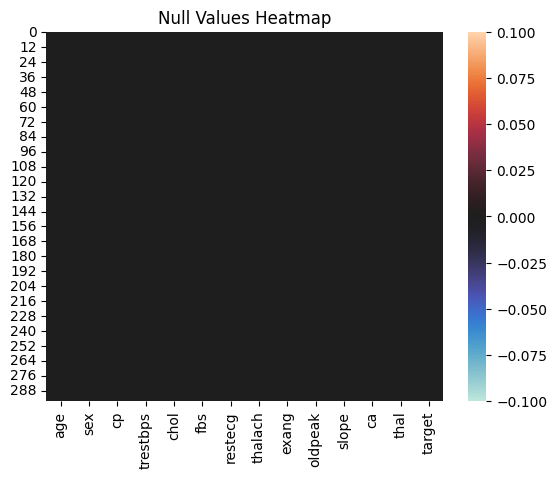

In [7]:
## this is the visual representation of null values present in data
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

*Fortunately, there is no missing values present in the dataset.*

In [8]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

## Exploratory Data analysis and visualisation

### Distribution of target variable

In [9]:
heart_df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [10]:
# Percentage of patients have and do not have heart disease
heart_df['target'].value_counts()/heart_df.shape[0]*100

target
0    53.872054
1    46.127946
Name: count, dtype: float64

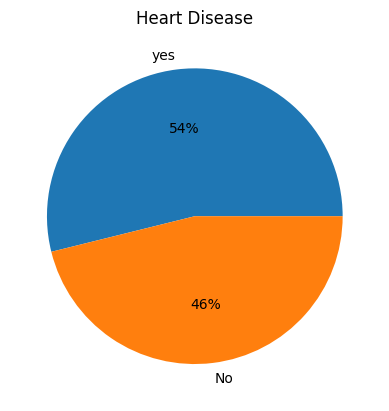

In [11]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

*As 54% of the person have heart attack so data is almost balanced so no need to balance the data.*


### Distribution of features 

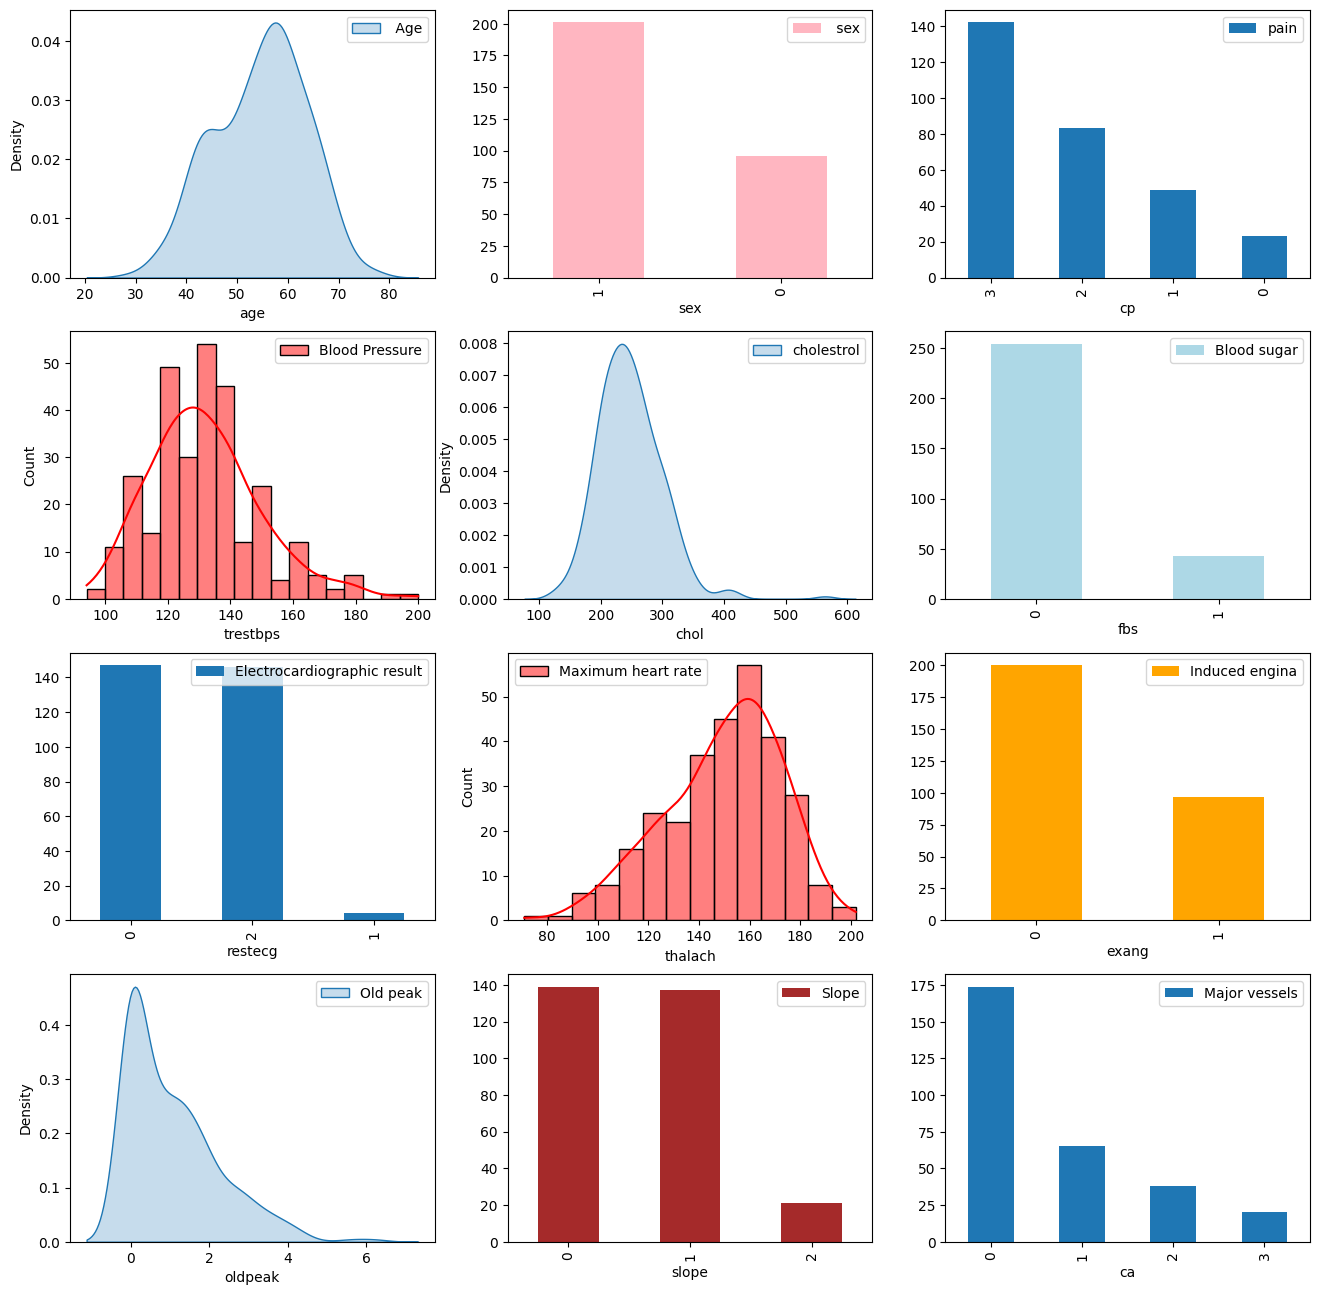

In [12]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()

fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()

fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()

fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.histplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()

fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()

fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()

fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()

fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.histplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()

fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()

fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()

fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()

fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()

plt.show()

*Most of the people have age between 50-60, are male, have less chest pain, blood pressure between 120 to 140, cholestrol between 200-300, blood sugar less than 120 and heart rate between 150-175.*

## Distribution of features w.r.t target

### Age distribution based on heart disease

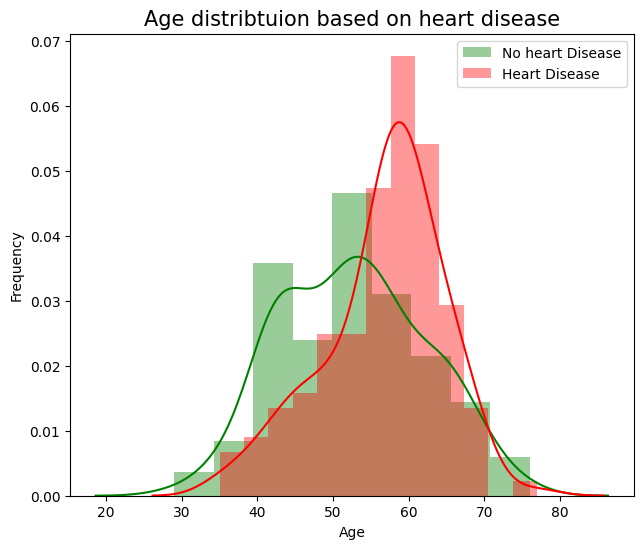

In [13]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()


In [14]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [15]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.75912408759124


*From above plot we can infer that People having age 40-75 are more likely to have heart disease.* 

### Heart disease frequency according to chest pain types

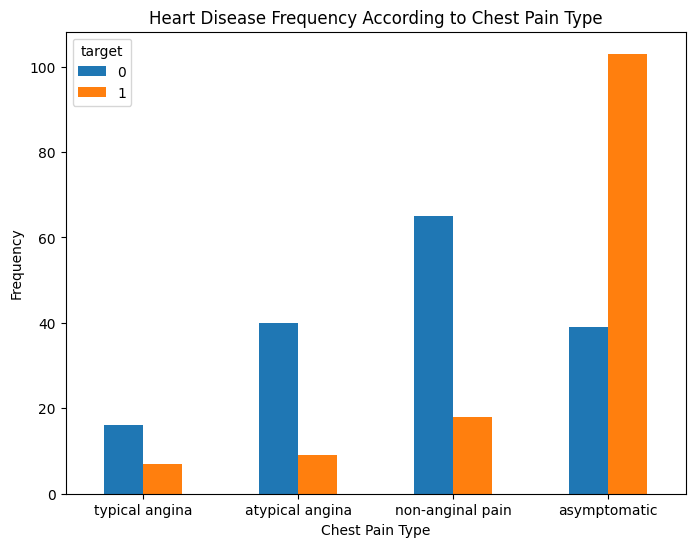

In [16]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*We can see that most of the people with the heart disease have **asymptomatic** chest pain.* 

### Blood pressure distribution based on heart rate

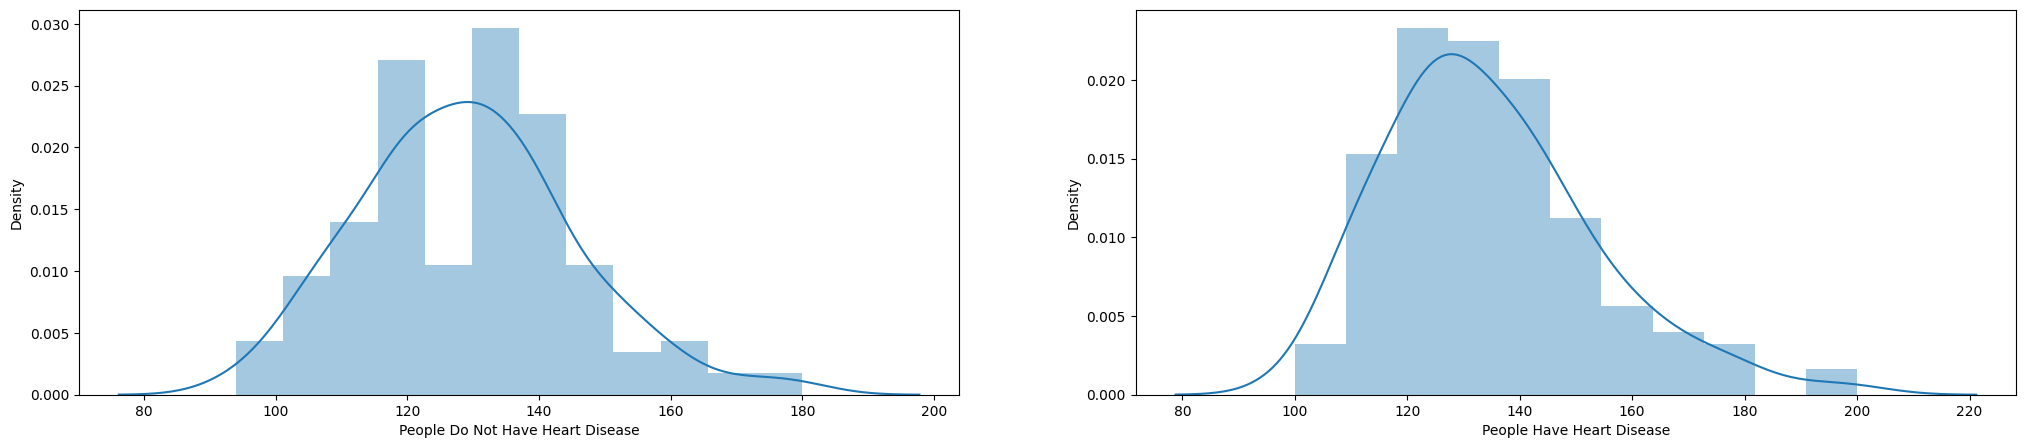

In [17]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [18]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.175


In [19]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.63503649635035


*People having blood pressure between **110 to 140** are more likely to have a heart attack*

### Cholesterol distribution based on heart disease

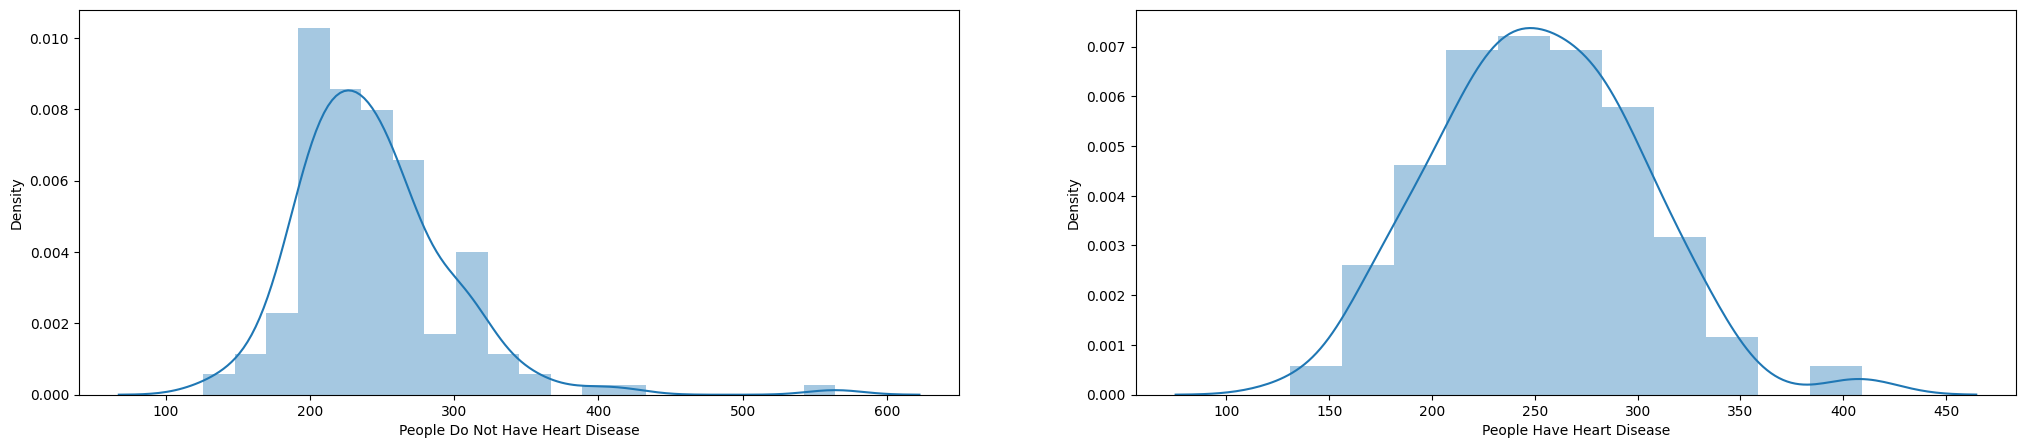

In [20]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [21]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  243.49375


In [22]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.85401459854015


### Heart Disease Frequency According to Fasting Blood Sugar

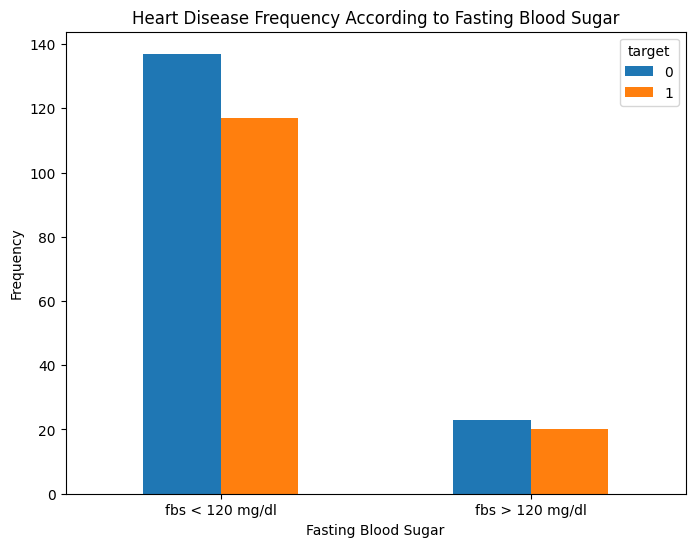

In [23]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According to Resting Electrocardiographic Results

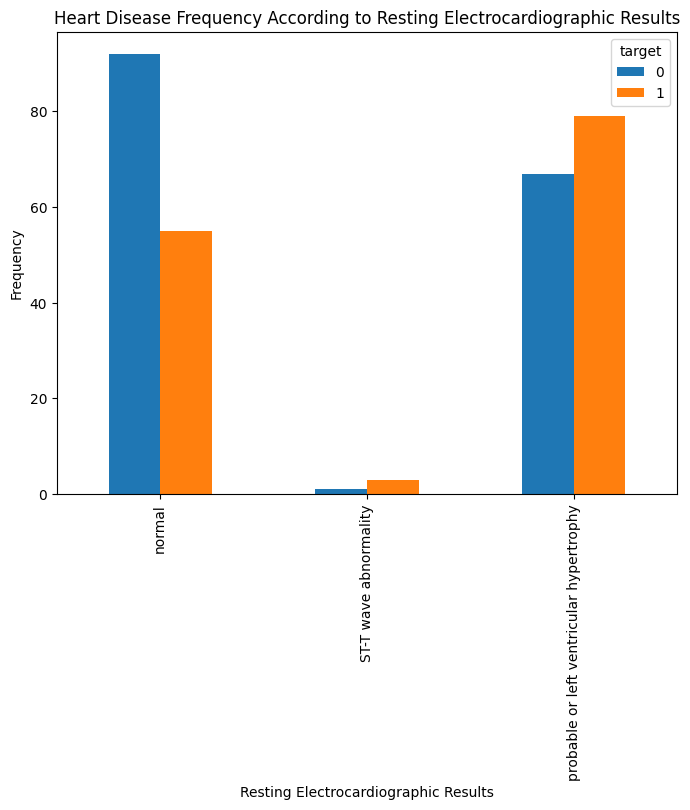

In [24]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


*Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.*

### Maximum heart rate distribution based on heart disease

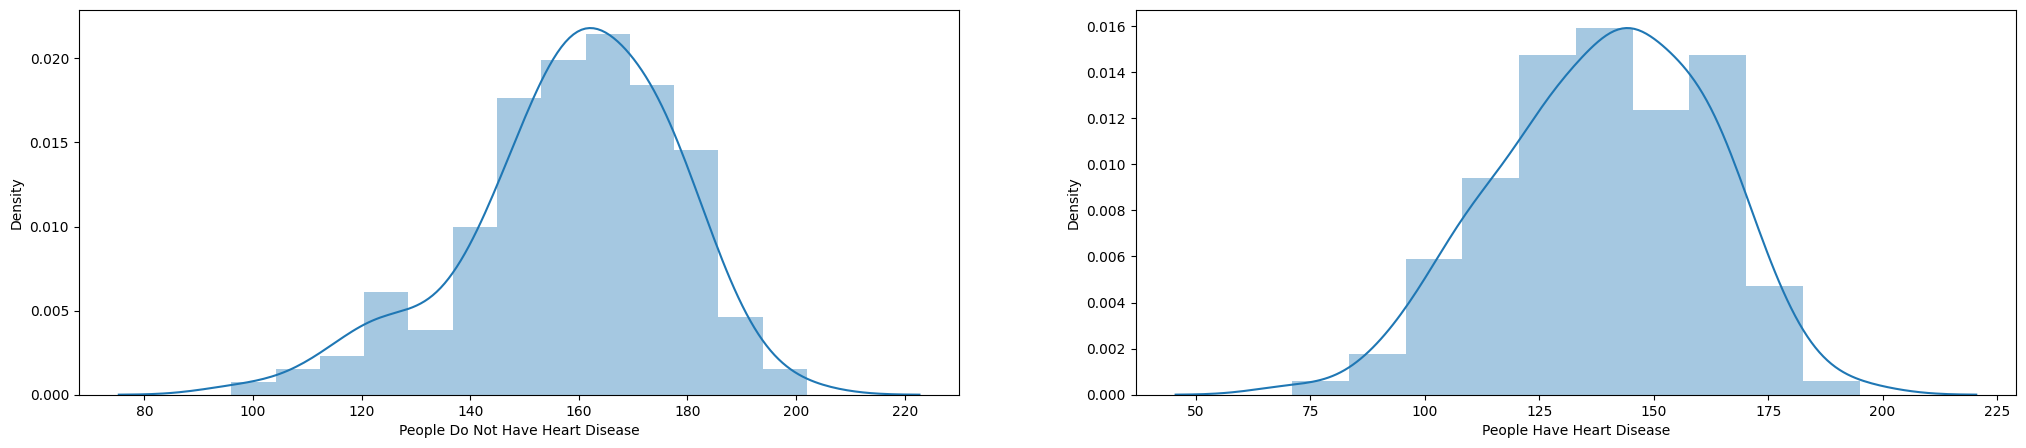

In [25]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

*The people who have high heart rate **greater than 150** are more likely to have heart disease.*

### ST depression distribution based on heart disease

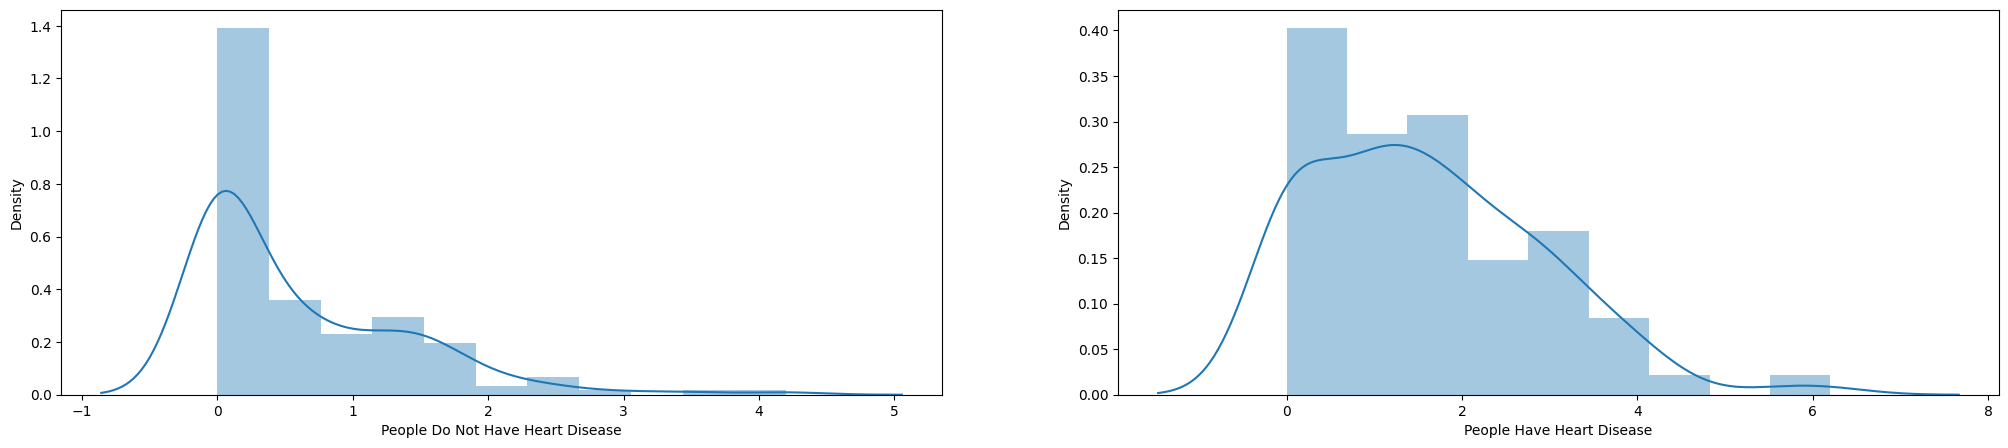

In [26]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [27]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.5987500000000001


In [28]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.5890510948905108


*The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5.*

### Heart Disease Frequency According to Exercise Induced Angina

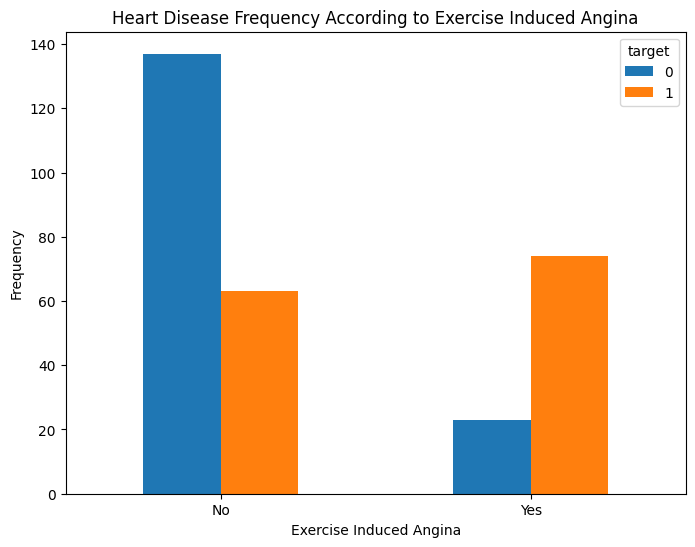

In [29]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.*

### Slope of the peak exercise ST segment based on the target

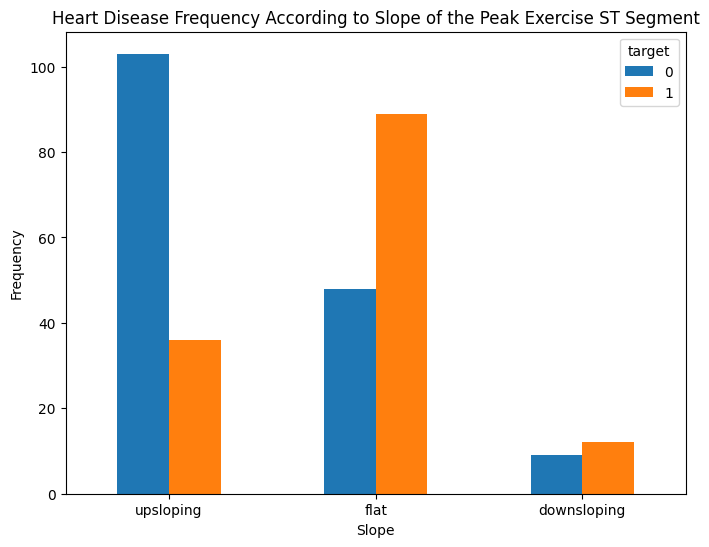

In [30]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*As we can see that,the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.*

### Number of vessels based on the target

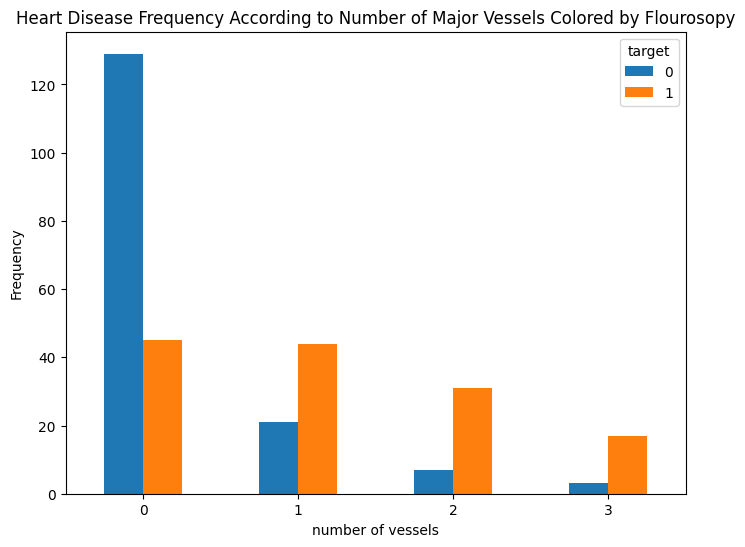

In [31]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

*People who do not have heart disease usually do not have major vessels colored by flourosopy*

### Heart Disease Frequency According to Thalassemia

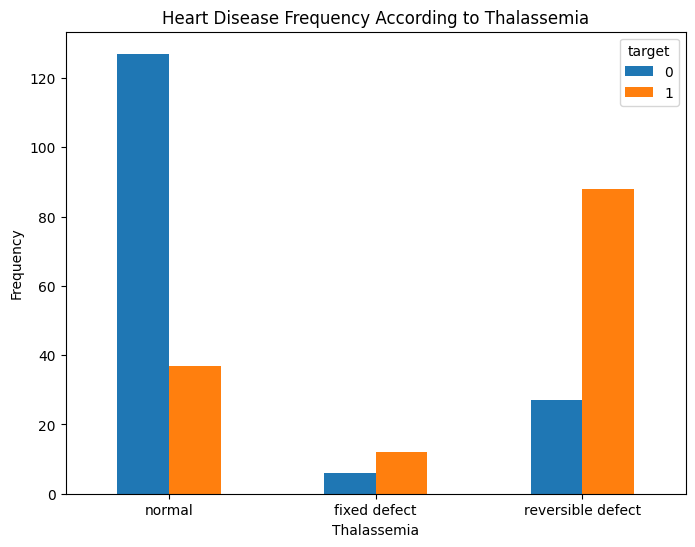

In [32]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

*People with reversible defect are more likely to have heart disease.*

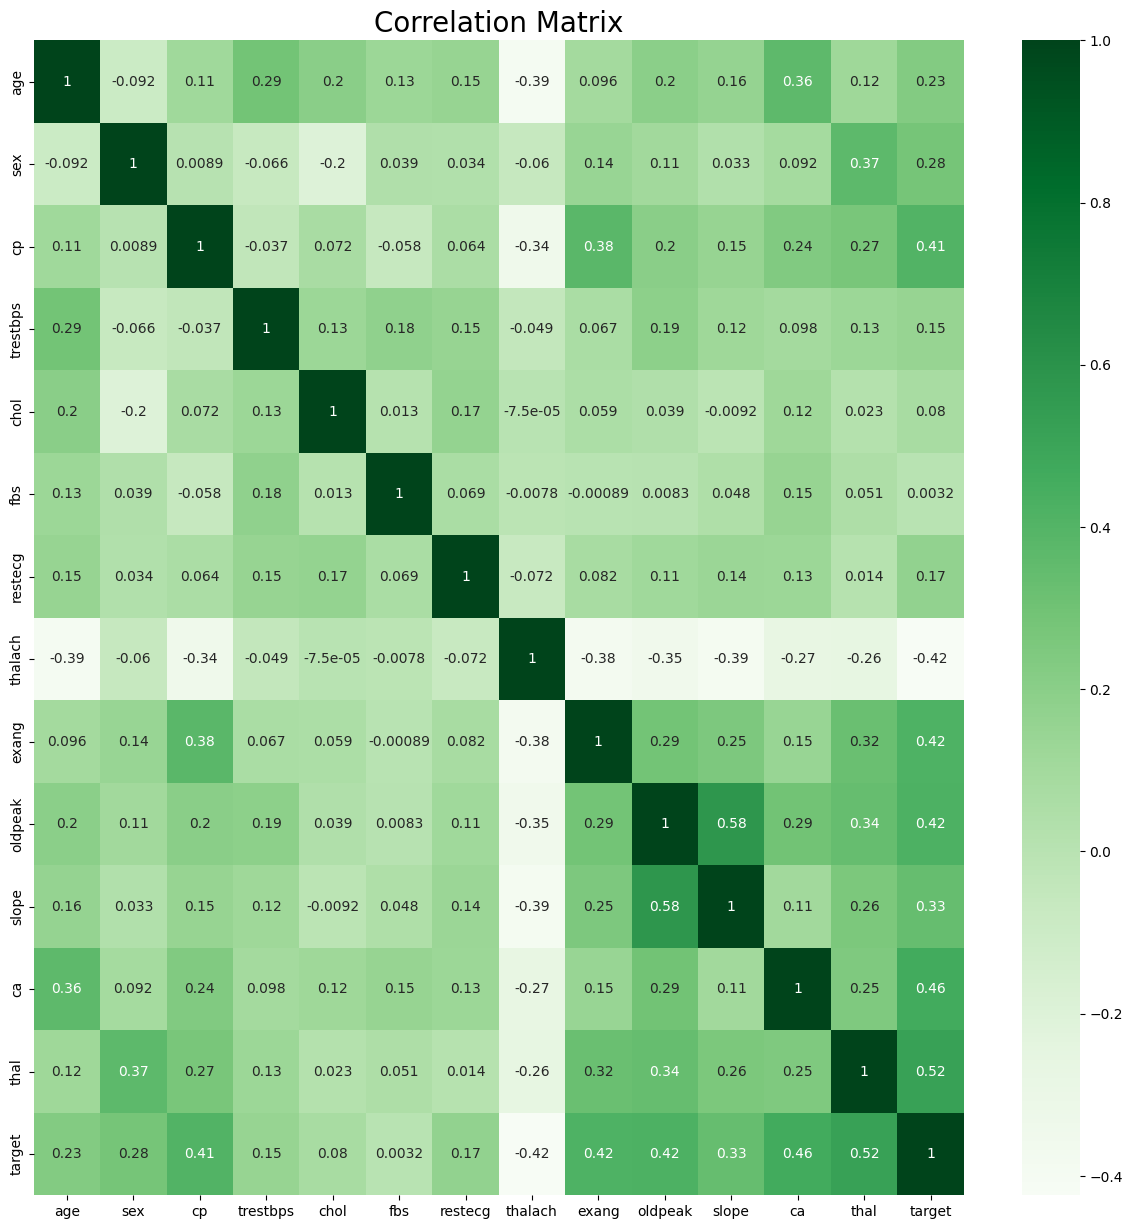

In [33]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly. We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

- The number of major vessels (0-3) colored by flourosopy (ca) and the age.
- ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
- The chest pain type (cp), exercise induced angina (exang).
- maximum heart rate (thalch) and the age.


### Model building and traning 

In [34]:

#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


Here I have kept **25% for testing** and the rest **75% is for training** the model.

In [35]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


### Logistic Regression Model 

In [36]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.76

In [37]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%



In [38]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[30,  8],
       [10, 27]], dtype=int64)

### K-nearest-neighbor classifier 

In [39]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.7466666666666667

In [40]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.75      0.73      0.74        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

Accuracy: 74.67%



In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[29,  9],
       [10, 27]], dtype=int64)

### Support Vector Classifier

In [42]:
SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

0.7866666666666666

In [43]:
print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.78      0.78      0.78        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%



In [44]:
cm = confusion_matrix(y_test, y_pred_SVC)
cm

array([[30,  8],
       [ 8, 29]], dtype=int64)

### Random Forest Classifier

In [51]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.8266666666666667

In [52]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.88      0.76      0.81        37

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75

Accuracy: 82.67%



In [47]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[29,  9],
       [ 9, 28]], dtype=int64)

### Decison Tree Classifier

In [48]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)


0.72

In [49]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.69      0.78      0.73        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75

Accuracy: 72.0%



In [50]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[25, 13],
       [ 8, 29]], dtype=int64)

Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct prediction made as a ratio of total prediction.

We have tried 5 different Machine learning Classification algorithm for our model prediction and see how each models are perfoming with the help of evaluation metics like accuracy, precision and f1 score.

#### *We can clearly see that the Random forest model really perfomed well with the highest accuracy compared to other classification model.*

### Conclusion 

So in this notebook we have developed a different machine learning model to predict the chances of having heart disease or not and seen that Random forest classifier had the highest accuracy compared to other models. 